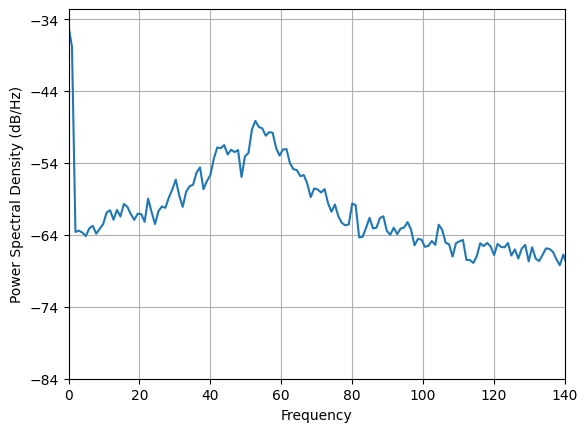

In [1]:
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

f = h5py.File('outputECP_lowerthres2_lowlearn_5000_just_tone_baseline/ecp.h5','r')
data = f['ecp']['data'][50000:][::10].reshape(-1,)
#data = f['ecp']['data'][50000:].reshape(-1,)
freq, psd = plt.psd(data, NFFT=1024, Fs=1000)
plt.xlim(0,140)
plt.show()



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



(0.0, 140.0)

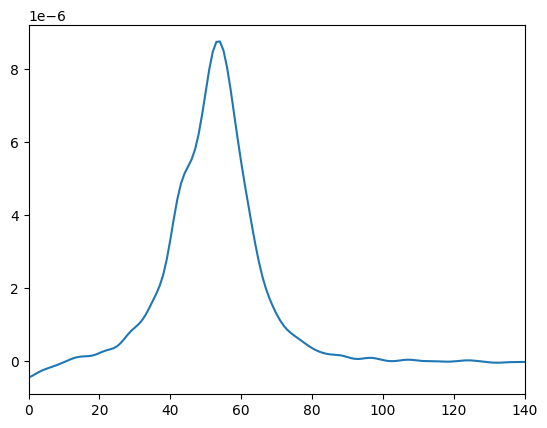

In [2]:
from fooof import FOOOF
from fooof.sim.gen import gen_aperiodic
from scipy.signal import welch

freqs,spectrum = welch(data,fs=1000,nfft=1024)
fm = FOOOF(aperiodic_mode='knee')
fm.fit(freqs, spectrum)
ap_fit = fm._ap_fit
residual_spec = spectrum[1:] - 10**ap_fit # making arrays match

plt.plot(residual_spec)
plt.xlim([0,140])

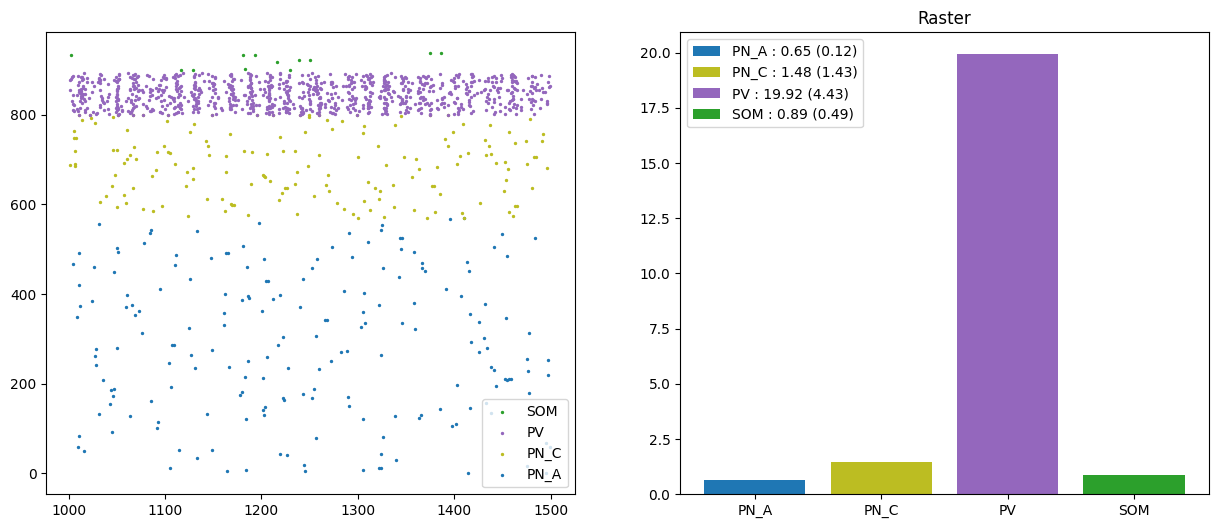

TypeError: 'module' object is not callable

In [1]:
import plot_raster

plot_raster()